In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
# Reading Dataset
df = pd.read_csv("dataset/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.shape

(23486, 11)

In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
#  Checking for Missing Values
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Text(0.5, 1.0, 'Missing Values per Feature')

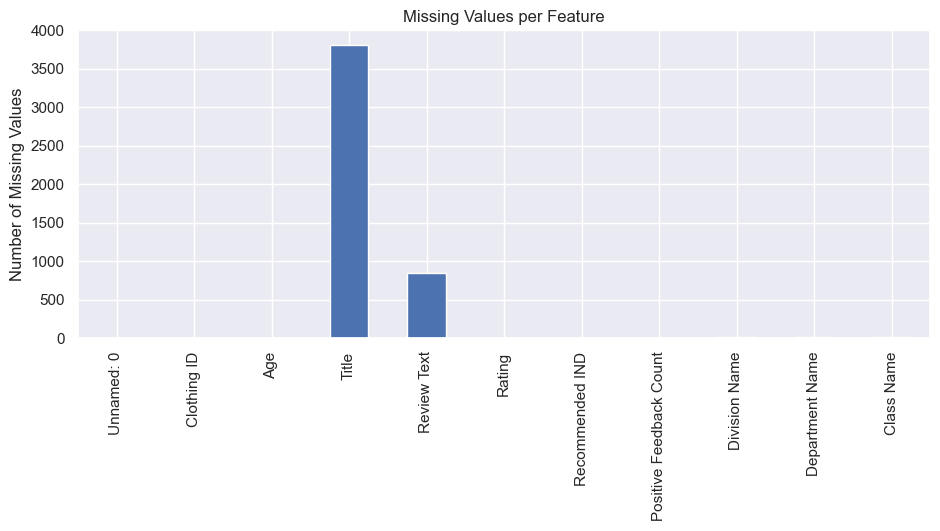

In [8]:
# The Amount of Missing Values per Feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Feature')

In [9]:
# Dropping columns:- Unnamed: 0, Clothing ID, Title
df.drop(['Unnamed: 0','Title','Clothing ID'],axis=1,inplace=True)
df.shape

(23486, 8)

In [10]:
# Dropping the records where review text is null
df = df[~df['Review Text'].isnull()]

In [11]:
# Fill NaN values with mode for each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Calculate the mode (most frequent value) for the column
    df[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
# # Specify the file path where you want to save the CSV file
# csv_file_path = 'preprocessed_data.csv'

# # Use the to_csv method to save the DataFrame to a CSV file
# df.to_csv(csv_file_path, index=True)

# # The 'index=False' argument prevents writing the index column to the CSV file

# print(f"DataFrame saved to {csv_file_path}")


# EDA

In [13]:
# Get the count of unique values for each numerical feature
unique_value_counts = df.select_dtypes(include=['number']).nunique()

# Print the unique value counts
print(unique_value_counts)

Age                        77
Rating                      5
Recommended IND             2
Positive Feedback Count    82
dtype: int64


In [14]:
# Get the count of unique values for each categorical feature
unique_value_counts = df.select_dtypes(include=['object']).nunique()

# Print the unique value counts for categorical features
print(unique_value_counts)

Review Text        22634
Division Name          3
Department Name        6
Class Name            20
dtype: int64


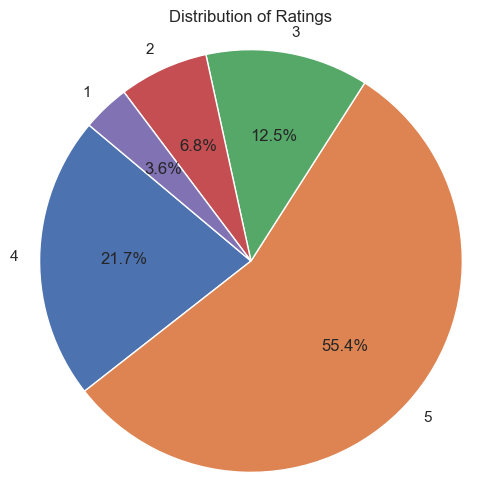

In [15]:
# Count the frequency of each unique value
value_counts = {}
for value in df.Rating:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Prepare data for the pie chart
values = list(value_counts.keys())
counts = list(value_counts.values())

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=values, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Ratings")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.

# Display the pie chart
plt.show()


C:\Users\91865\AppData\Local\Temp\ipykernel_5624\998823312.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist_kws=dict(edgecolor="k")).set_title("Distribution of Age")


Text(0.5, 1.0, 'Distribution of Age')

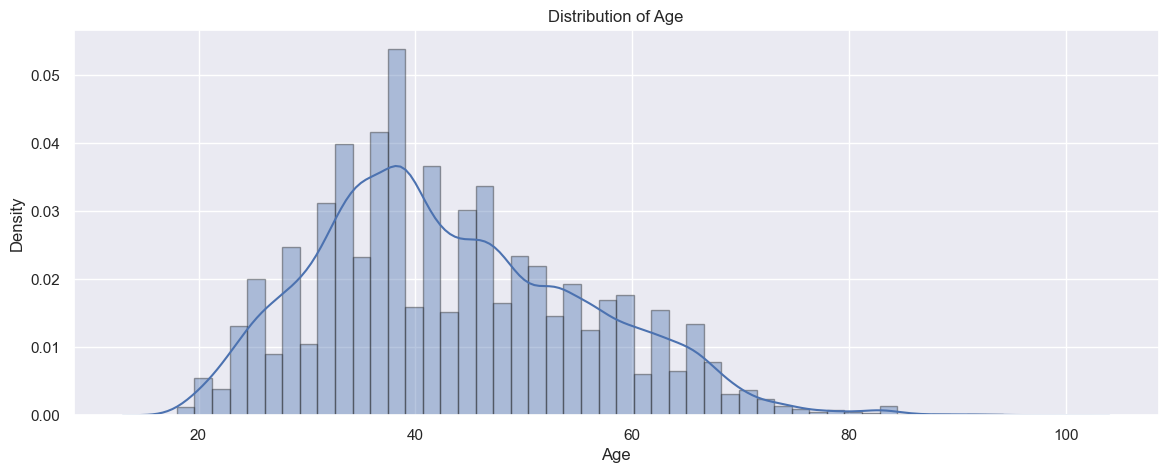

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize= (14,5))
sns.distplot(df['Age'], hist_kws=dict(edgecolor="k")).set_title("Distribution of Age")

Text(0.5, 1.0, 'Number of Reviews per Age')

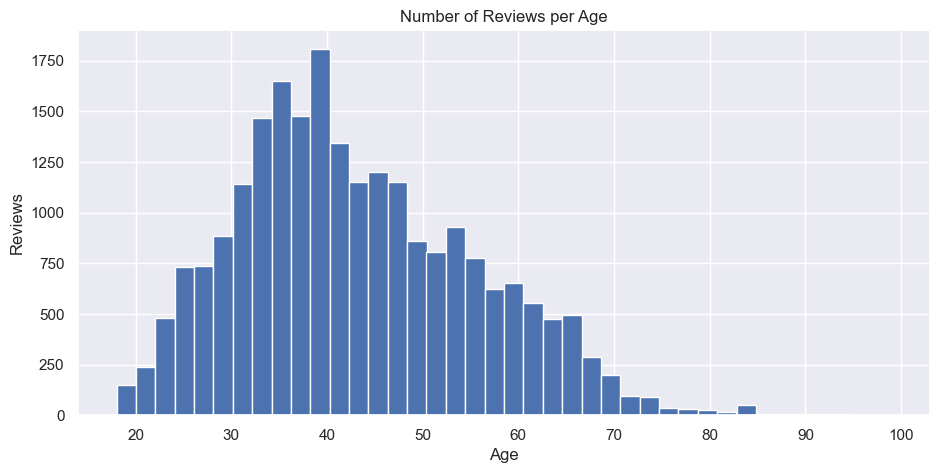

In [17]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of Reviews per Age')

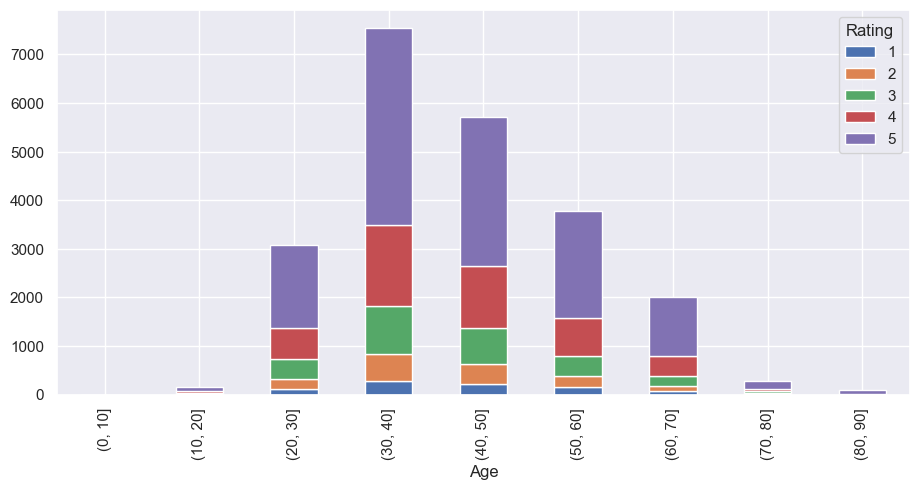

In [18]:
# Distribution of Rating vs Age Groups
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar',stacked=True)
plt.show()

Text(0.5, 1.0, 'Rating Distribution per Age')

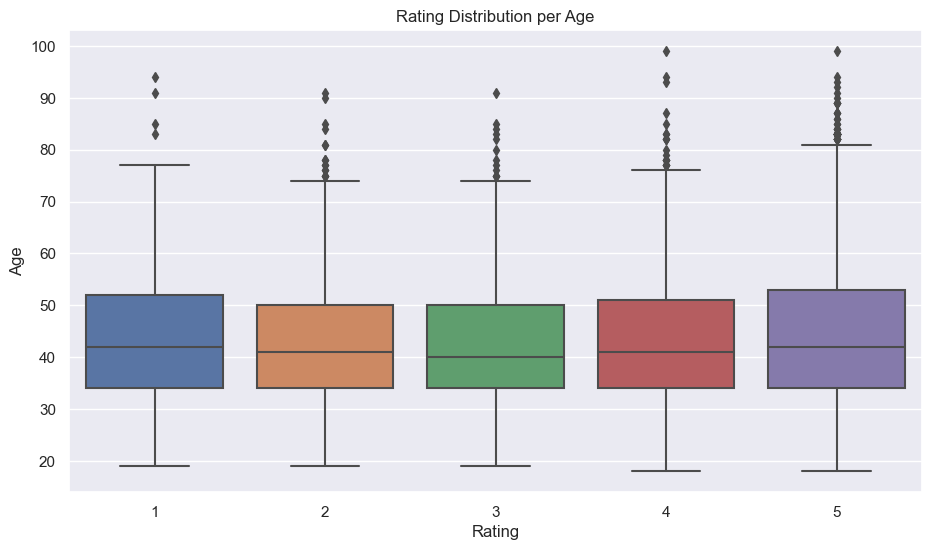

In [19]:
sns.set(rc={'figure.figsize':(11,6)})
sns.boxplot(x = 'Rating', y = 'Age', data = df)
plt.title('Rating Distribution per Age')

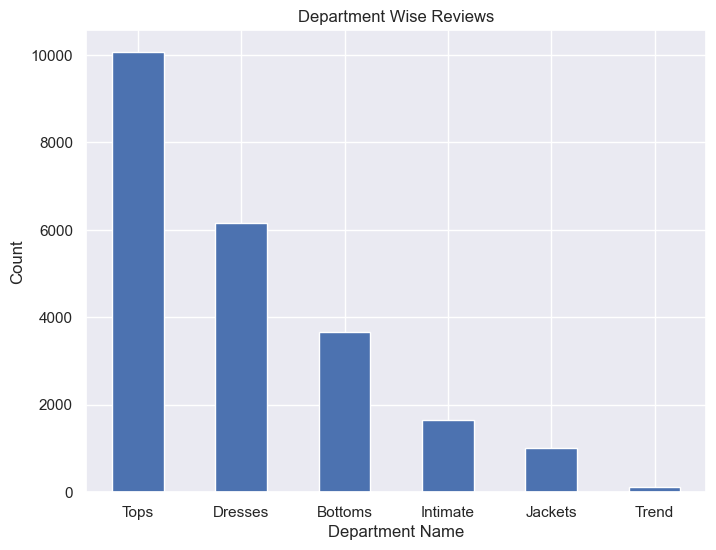

In [20]:
# subsetting the dataframe to plot which department is contributing to most reviews
# Transpose the value_counts DataFrame for plotting
value_counts = df['Department Name'].value_counts()

# Create a bar chart
value_counts.plot(kind='bar', figsize=(8, 6))
plt.title("Department Wise Reviews")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the bar chart
plt.show()

Text(0.5, 1.0, 'Counts Vs Division Name')

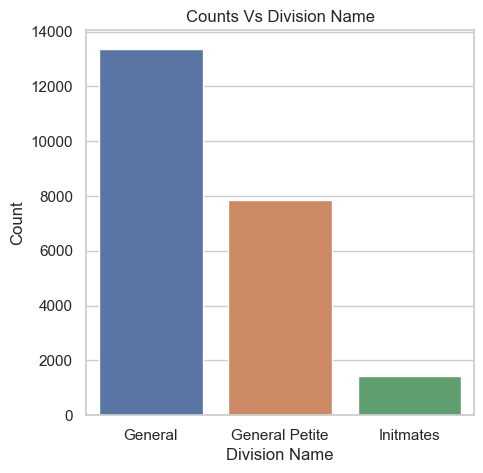

In [21]:
w = df.groupby(by=['Division Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division Name'],y=w['Class Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

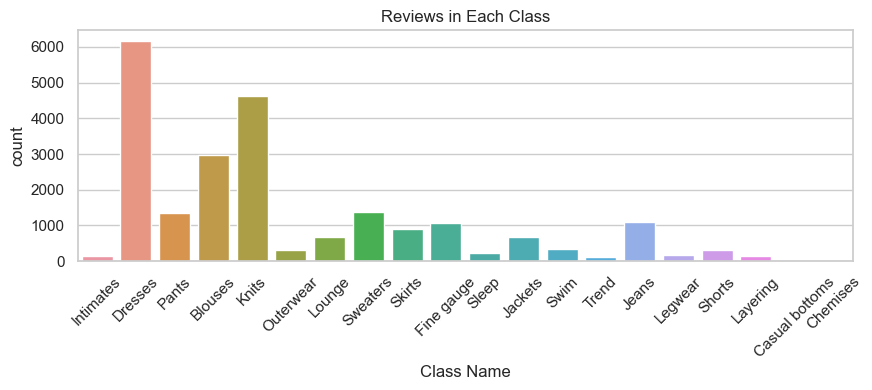

In [22]:
#  Distribution of Class
class_order = df['Class Name'].unique()
plt.figure(figsize=(10,3))  # Set the figure size
ax = sns.countplot(data=df, x='Class Name', order=class_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability
plt.title("Reviews in Each Class")
plt.show()

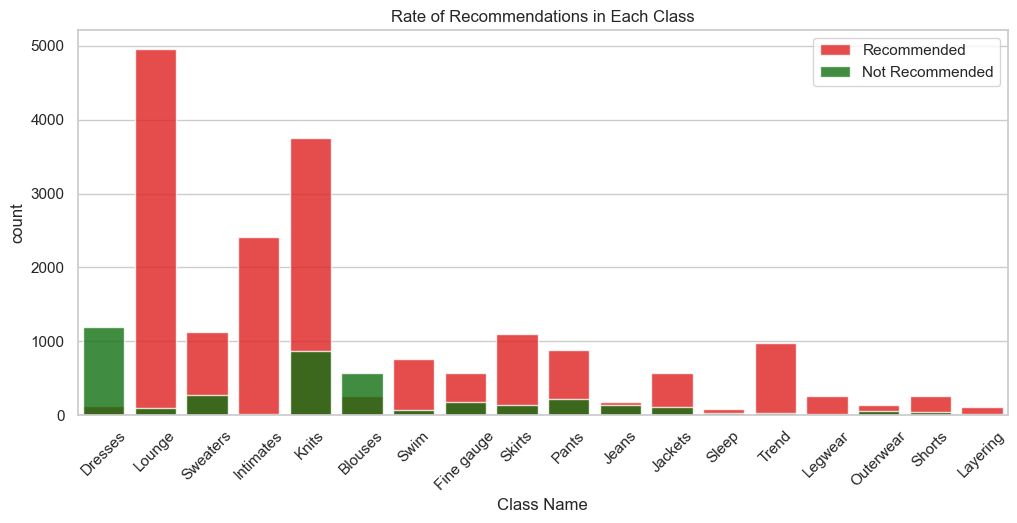

In [23]:
#  Rate of Recommendations
# Create two separate DataFrames for recommended and not recommended items
recommended = df[df['Recommended IND'] == 1]
not_recommended = df[df['Recommended IND'] == 0]

# Set the figure size
plt.figure(figsize=(12, 5))

# Create the count plots for recommended and not recommended items
ax0 = sns.countplot(data=recommended, x='Class Name', color="red", alpha=0.8, label="Recommended")
ax1 = sns.countplot(data=not_recommended, x='Class Name', color="green", alpha=0.8, label="Not Recommended")

# Rotate x-axis labels for better readability
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)

# Set the title and legend
plt.title("Rate of Recommendations in Each Class")
plt.legend()

plt.show()

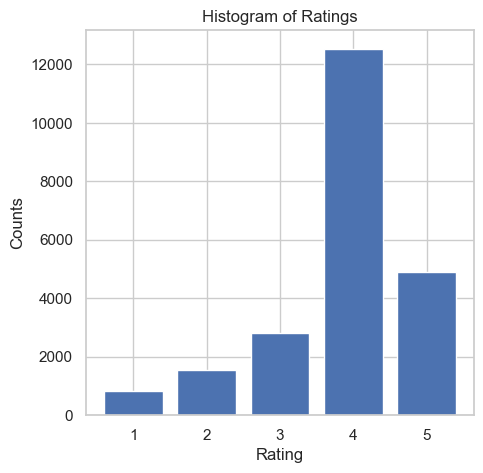

<Figure size 800x400 with 0 Axes>

In [24]:
h = df["Rating"].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(df["Rating"].unique(),h)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings")
plt.figure(figsize=(8,4))
ax.grid(True)
plt.rcParams['axes.axisbelow'] = True

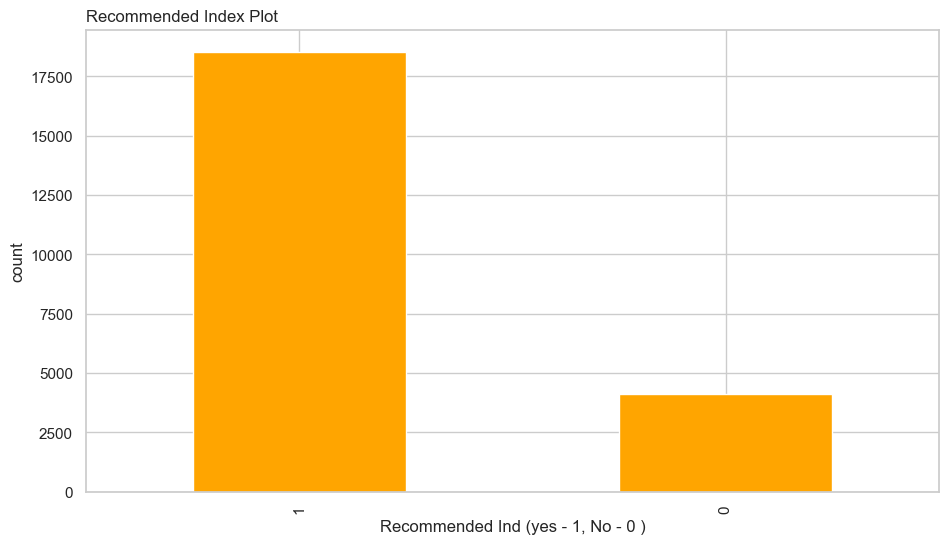

In [25]:
#Bar plot to check the count of recommended v/s not recommended
df['Recommended IND'].value_counts()[:].plot(kind='bar', color='orange')
df['Recommended IND'].value_counts()
plt.title("Recommended Index Plot",loc ='left')
plt.xlabel('Recommended Ind (yes - 1, No - 0 )')
plt.ylabel('count')
plt.show()

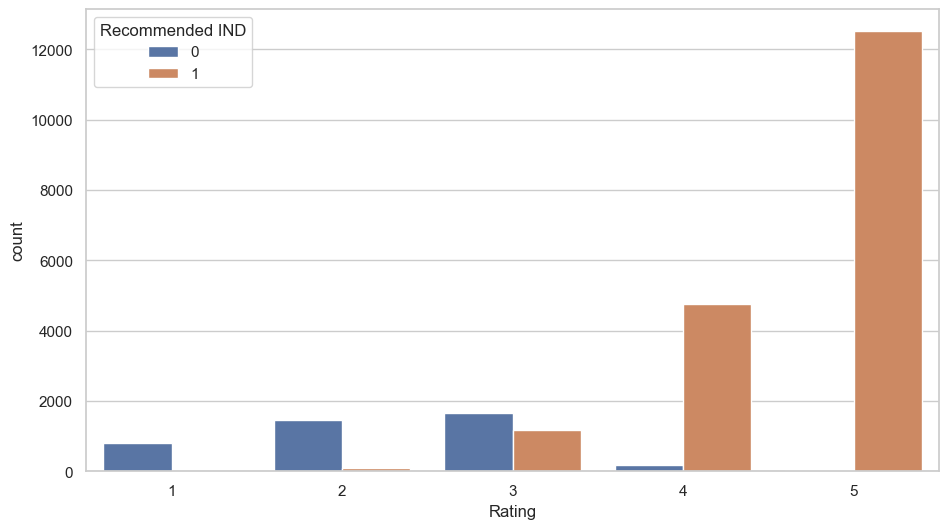

In [26]:
# rating and recommended
sns.countplot(x='Rating', hue='Recommended IND',data=df)
sns.set(rc={'figure.figsize':(1,1)})

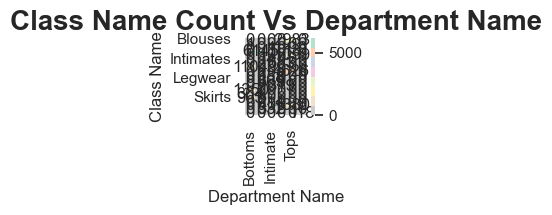

In [27]:
#  Correlation Plot of Department,Division and Class Against Each Other
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]), annot=True,fmt='g', cmap="Pastel2_r")
plt.title("Class Name Count Vs Department Name",fontsize=20,fontweight='bold')
plt.show()

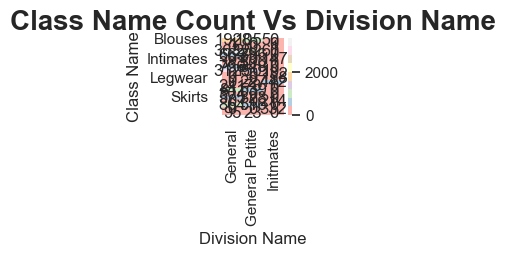

In [28]:
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]), annot=True,fmt='g', cmap="Pastel1")
plt.title("Class Name Count Vs Division Name",fontsize=20,fontweight='bold')
plt.show()

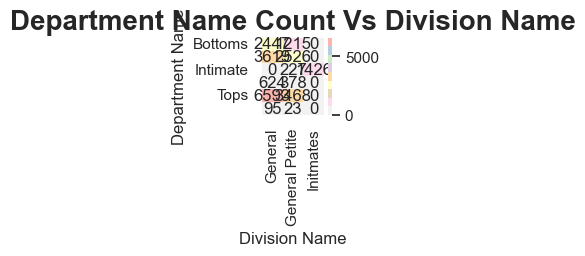

In [29]:
sns.heatmap(pd.crosstab(df['Department Name'], df["Division Name"]),annot=True,fmt='g', cmap="Pastel1_r")
plt.title("Department Name Count Vs Division Name",fontsize=20,fontweight='bold')
plt.show()

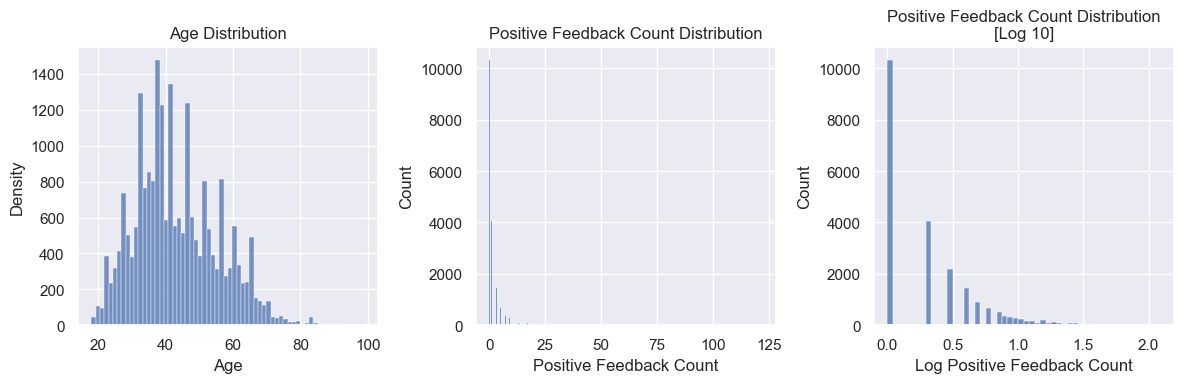

In [30]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.histplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.histplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.histplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [53]:
df1 = df[['Review Text', 'Recommended IND', 'Rating']].copy()
df1.head()

,Review Text,Recommended IND,Rating
0,Absolutely wonderful - silky and sexy and comf...,1,4
1,Love this dress! it's sooo pretty. i happene...,1,5
2,I had such high hopes for this dress and reall...,0,3
3,"I love, love, love this jumpsuit. it's fun, fl...",1,5
4,This shirt is very flattering to all due to th...,1,5


In [54]:
# Convert the text to lowercase
df1['Review Text'] = df1['Review Text'].str.lower()

In [55]:
# removing stop words
import nltk
from nltk.corpus import stopwords
# Download NLTK data (if not already downloaded)
# nltk.download('stopwords')  # Download stopwords data
stop_words = set(stopwords.words('english'))  # Get English stopwords

# print(stop_words)

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df1['Review Text'] = df1['Review Text'].apply(remove_stopwords)

# Display the DataFrame
df1.head()

,Review Text,Recommended IND,Rating
0,absolutely wonderful - silky sexy comfortable,1,4
1,"love dress! sooo pretty. happened find store, ...",1,5
2,high hopes dress really wanted work me. initia...,0,3
3,"love, love, love jumpsuit. fun, flirty, fabulo...",1,5
4,shirt flattering due adjustable front tie. per...,1,5


In [56]:
import re

# Function to remove special characters using regex
def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^A-Za-z0-9\s]+'
    
    # Use re.sub to replace matched patterns with an empty string
    clean_text = re.sub(pattern, '', text)
    
    return clean_text

# Apply the remove_special_characters function
df1['Review Text'] = df1['Review Text'].apply(remove_special_characters)

# Display the DataFrame with special characters removed and converted to lowercase
df1.head()

,Review Text,Recommended IND,Rating
0,absolutely wonderful silky sexy comfortable,1,4
1,love dress sooo pretty happened find store im ...,1,5
2,high hopes dress really wanted work me initial...,0,3
3,love love love jumpsuit fun flirty fabulous ev...,1,5
4,shirt flattering due adjustable front tie perf...,1,5


In [57]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant', 'jumpsuit',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

def remove_clothing(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in clothes]
    return ' '.join(filtered_words)

# Apply the tokenize_and_remove_stopwords function 
df1['Review Text'] = df1['Review Text'].apply(remove_clothing)

# Display the DataFrame
df1.head()

,Review Text,Recommended IND,Rating
0,absolutely wonderful silky sexy comfortable,1,4
1,love sooo pretty happened find store im glad b...,1,5
2,high hopes really wanted work me initially ord...,0,3
3,love love love fun flirty fabulous every time ...,1,5
4,flattering due adjustable front tie perfect le...,1,5


In [58]:
# tokenization
from nltk.tokenize import word_tokenize
# nltk.download('punkt')

# Define a function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the DataFrame
df1['filtered_tokens'] = df1['Review Text'].apply(tokenize_text)

df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens
0,absolutely wonderful silky sexy comfortable,1,4,"[absolutely, wonderful, silky, sexy, comfortable]"
1,love sooo pretty happened find store im glad b...,1,5,"[love, sooo, pretty, happened, find, store, im..."
2,high hopes really wanted work me initially ord...,0,3,"[high, hopes, really, wanted, work, me, initia..."
3,love love love fun flirty fabulous every time ...,1,5,"[love, love, love, fun, flirty, fabulous, ever..."
4,flattering due adjustable front tie perfect le...,1,5,"[flattering, due, adjustable, front, tie, perf..."


In [59]:
# Define a function to check if a list of tokens contains numeric data
def has_numeric(tokens):
    return any(token.isdigit() for token in tokens)

# Check if any cell in the entire DataFrame contains numeric data
contains_numeric = df1['filtered_tokens'].apply(has_numeric).any()

# Print "Yes" if any cell has numeric data, otherwise print "No"
print("Yes" if contains_numeric else "No")

Yes


In [60]:
# Define a function to remove tokens with numeric data
def remove_numeric(tokens):
    return [token for token in tokens if not any(char.isdigit() for char in token)]

# Remove numeric tokens from the 'tokens' column
df1['filtered_tokens'] = df1['filtered_tokens'].apply(remove_numeric)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens
0,absolutely wonderful silky sexy comfortable,1,4,"[absolutely, wonderful, silky, sexy, comfortable]"
1,love sooo pretty happened find store im glad b...,1,5,"[love, sooo, pretty, happened, find, store, im..."
2,high hopes really wanted work me initially ord...,0,3,"[high, hopes, really, wanted, work, me, initia..."
3,love love love fun flirty fabulous every time ...,1,5,"[love, love, love, fun, flirty, fabulous, ever..."
4,flattering due adjustable front tie perfect le...,1,5,"[flattering, due, adjustable, front, tie, perf..."


In [61]:
# Check if any cell in the entire DataFrame contains numeric data
contains_numeric = df1['filtered_tokens'].apply(has_numeric).any()

# Print "Yes" if any cell has numeric data, otherwise print "No"
print("Yes" if contains_numeric else "No")

No


In [62]:
# Define a function to remove duplicates from a list of tokens
def remove_duplicates(tokens):
    return list(set(tokens))

# Apply the 'remove_duplicates' function 
df1['filtered_tokens'] = df1['filtered_tokens'].apply(remove_duplicates)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]"
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,..."
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl..."
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa..."
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ..."


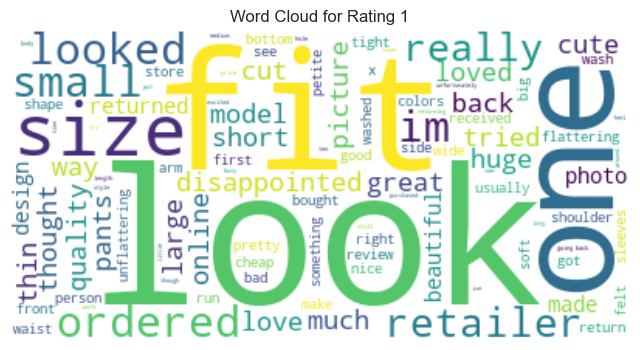

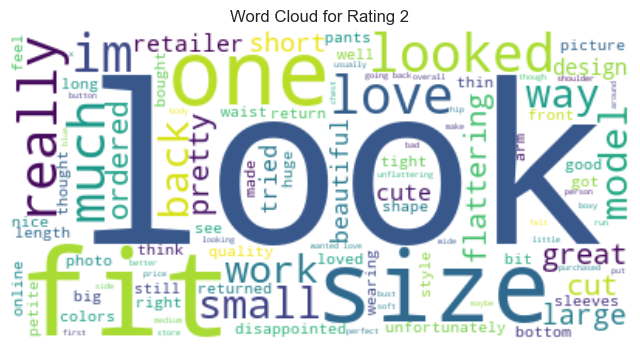

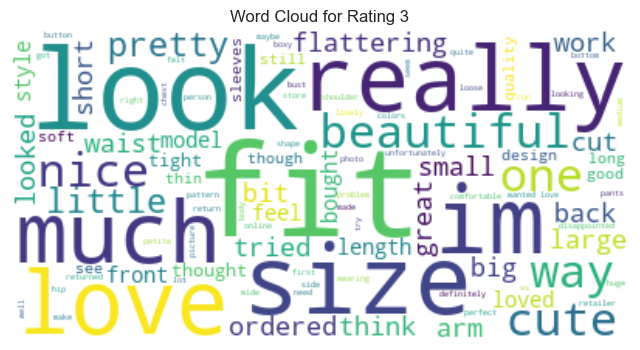

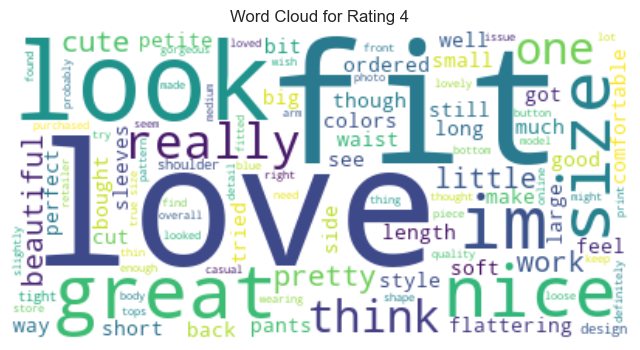

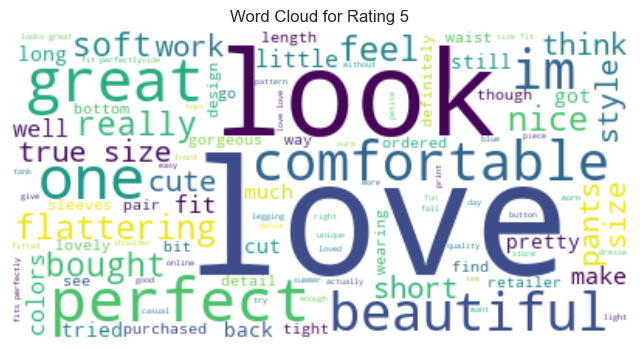

In [63]:
from wordcloud import WordCloud

# Create a function to generate word clouds for each rating
def generate_word_cloud_for_rating(df1, rating):
    # Filter the DataFrame for the specified rating
    rating_df = df1[df1['Rating'] == rating]
    
    # Concatenate all reviews for the current rating
    text_data = ' '.join(rating_df['Review Text'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(
        background_color='white',  # Background color of the word cloud
        max_words=100,             # Maximum number of words to display
        colormap='viridis',        # Colormap for coloring words
    )
    
    # Generate the word cloud
    wordcloud.generate(text_data)
    
    # Display the word cloud with the rating as the title
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.axis('off')  # Remove axis labels and ticks
    plt.show()

# Sort unique ratings in ascending order
ratings = sorted(df1['Rating'].unique())

# Call the function for each rating in ascending order
for rating in ratings:
    generate_word_cloud_for_rating(df1, rating)


In [64]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply the 'stem_tokens' function 
df1['stemmed_tokens'] = df1['filtered_tokens'].apply(stem_tokens)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[sexi, silki, absolut, comfort, wonder]"
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[definit, littl, bought, love, midi, find, onl..."
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, zip, major, flaw, net, fact, my, directl..."
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[get, great, time, everi, fun, it, noth, fabul..."
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, length, leg, cardigan, sleeveless, well,..."


In [65]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token, wordnet.VERB) for token in tokens]
    return lemmatized_tokens

# Apply the 'lemmatize_tokens' function
df1['lemmatized_tokens'] = df1['filtered_tokens'].apply(lemmatize_tokens)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[sexi, silki, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]"
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[definit, littl, bought, love, midi, find, onl...","[definitely, little, buy, love, midi, find, on..."
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, zip, major, flaw, net, fact, my, directl...","[fit, zip, major, flaw, net, fact, my, directl..."
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[get, great, time, everi, fun, it, noth, fabul...","[get, great, time, every, fun, it, nothing, fa..."
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, length, leg, cardigan, sleeveless, well,...","[due, length, leggings, cardigan, sleeveless, ..."


In [66]:
# Define a function to remove duplicates from a list of tokens
def remove_duplicates(tokens):
    return list(set(tokens))

# Apply the 'remove_duplicates' function 
df1['stemmed_tokens'] = df1['stemmed_tokens'].apply(remove_duplicates)
df1['lemmatized_tokens'] = df1['lemmatized_tokens'].apply(remove_duplicates)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]"
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on..."
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di..."
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa..."
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai..."


In [107]:
# takes too much computation time
# remove rare words i.e words which appear less than 5 times in the data frame
from collections import Counter

# Create a vocabulary that counts word frequency in the entire DataFrame
vocab_stemmed = Counter(word for tokens in df1['stemmed_tokens'] for word in tokens)
vocab_lemm = Counter(word for tokens in df1['lemmatized_tokens'] for word in tokens)

# Identify words that appear less than 5 times
rare_stemmed = [word for word, count in vocab_stemmed.items() if count < 5]
rare_lemm = [word for word, count in vocab_lemm.items() if count < 5]

# Filter tokens to remove rare words
df1['filtered_stemmed'] = df1['stemmed_tokens'].apply(lambda tokens: [word for word in tokens if word not in rare_stemmed])
df1['filtered_lemm'] = df1['lemmatized_tokens'].apply(lambda tokens: [word for word in tokens if word not in rare_lemm])

# Display the DataFrame with filtered tokens
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens,filtered_stemmed,filtered_lemm,TextBlob_polarity,TextBlob_label,IntensityAnalyzer_polarity,IntensityAnalyzer_label
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]",0.633333,positive,0.8991,positive
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...",0.318750,positive,0.9710,positive
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...",0.062409,positive,0.8885,positive
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...",0.500000,positive,0.9464,positive
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...",0.458333,positive,0.9062,positive


In [68]:
df1['filtered_lemm'] = df1['lemmatized_tokens']
df1['filtered_stemmed'] = df1['stemmed_tokens']
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens,filtered_stemmed,filtered_lemm
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]"
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on..."
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di..."
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa..."
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai..."


## Sentiment Analysis using TextBlob
TextBlob uses a rule-based approach combined with a sentiment lexicon and predefined rules to determine the polarity (positive, negative, or neutral) of a given text. It employs a lexicon-based approach to assign sentiment scores to words and phrases and combines these scores to compute the overall sentiment polarity of the text. 

In [69]:
from textblob import TextBlob

# Create a function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment

    # Determine sentiment polarity
    polarity = sentiment.polarity

    # Determine sentiment label
    if polarity > 0:
        sentiment_label = 'positive'
    elif polarity < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    return polarity, sentiment_label

# Apply sentiment analysis to each row in the DataFrame 
df1[['TextBlob_polarity', 'TextBlob_label']] = df1['Review Text'].apply(analyze_sentiment).apply(pd.Series)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens,filtered_stemmed,filtered_lemm,TextBlob_polarity,TextBlob_label
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]",0.633333,positive
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...",0.318750,positive
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...",0.062409,positive
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...",0.500000,positive
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...",0.458333,positive


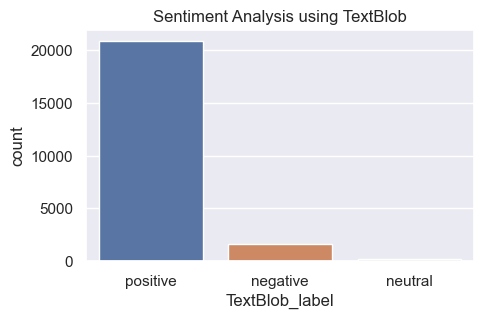

In [70]:
# Create a bar plot for each label
plt.figure(figsize=(5,3))
sns.countplot(data=df1, x='TextBlob_label')
plt.title('Sentiment Analysis using TextBlob')
plt.show()

In [71]:
# Use value_counts() to count the occurrences of each label
label_counts = df1['TextBlob_label'].value_counts()

# Display the label counts
print(label_counts)

positive    20893
negative     1589
neutral       159
Name: TextBlob_label, dtype: int64


## VADER Sentiment Analyzer
It is part of the Natural Language Toolkit (NLTK) library in Python. It uses a lexicon-based approach combined with a pre-trained sentiment lexicon to calculate sentiment scores for text. It calculates sentiment scores based on the presence of words and phrases in the lexicon.

In [72]:
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores using the analyzer
def calculate_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']  # Using the compound score as an overall sentiment score
    if compound_score > 0.2:
        sentiment_label = 'positive'
    elif compound_score < -0.2:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    return compound_score, sentiment_label

# Apply the sentiment analysis function to the 'Review Text' column 
df1[['IntensityAnalyzer_polarity', 'IntensityAnalyzer_label']] = df1['Review Text'].apply(calculate_sentiment_scores).apply(pd.Series)

# Display the updated DataFrame
df1.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens,filtered_stemmed,filtered_lemm,TextBlob_polarity,TextBlob_label,IntensityAnalyzer_polarity,IntensityAnalyzer_label
0,absolutely wonderful silky sexy comfortable,1,4,"[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]","[silki, sexi, absolut, comfort, wonder]","[sexy, silky, absolutely, comfortable, wonderful]",0.633333,positive,0.8991,positive
1,love sooo pretty happened find store im glad b...,1,5,"[definitely, little, bought, love, midi, find,...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...","[bought, littl, onlin, love, midi, pretti, fin...","[definitely, little, buy, love, midi, find, on...",0.318750,positive,0.9710,positive
2,high hopes really wanted work me initially ord...,0,3,"[fit, zip, major, flaw, net, fact, my, directl...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...","[fit, hope, zip, major, flaw, net, directli, f...","[fit, zip, major, flaw, net, sew, fact, my, di...",0.062409,positive,0.8885,positive
3,love love love fun flirty fabulous every time ...,1,5,"[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...","[noth, everi, get, fabul, great, time, flirti,...","[get, great, time, every, fun, it, nothing, fa...",0.500000,positive,0.9464,positive
4,flattering due adjustable front tie perfect le...,1,5,"[due, length, leggings, cardigan, sleeveless, ...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...","[due, cardigan, length, flatter, adjust, pair,...","[due, cardigan, length, leggings, flatter, pai...",0.458333,positive,0.9062,positive


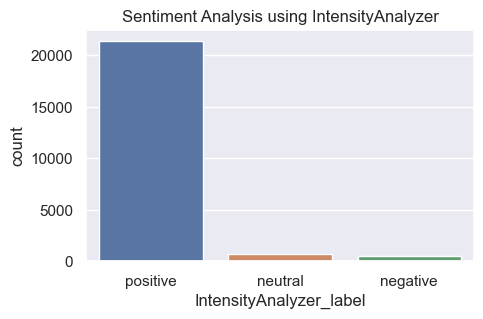

In [73]:
# Create a bar plot for each label
plt.figure(figsize=(5,3))
sns.countplot(data=df1, x='IntensityAnalyzer_label')
plt.title('Sentiment Analysis using IntensityAnalyzer')
plt.show()

In [74]:
# Use value_counts() to count the occurrences of each label
label_counts = df1['IntensityAnalyzer_label'].value_counts()

# Display the label counts
print(label_counts)

positive    21414
neutral       714
negative      513
Name: IntensityAnalyzer_label, dtype: int64


In [75]:
from sklearn.utils import resample

# Undersample the "positive" class
undersampled_positive = resample(df1[df1['IntensityAnalyzer_label'] == 'positive'], n_samples=1200, random_state=42)

# Keep all samples from the other classes
other_classes = df1[df1['IntensityAnalyzer_label'] != 'positive']

# Combine the undersampled "positive" class with the other classes
balanced_data = pd.concat([undersampled_positive, other_classes])

# Check the class distribution in the balanced dataset
class_distribution = balanced_data['IntensityAnalyzer_label'].value_counts()
print(class_distribution)

positive    1200
neutral      714
negative     513
Name: IntensityAnalyzer_label, dtype: int64


In [76]:
balanced_data.head()

,Review Text,Recommended IND,Rating,filtered_tokens,stemmed_tokens,lemmatized_tokens,filtered_stemmed,filtered_lemm,TextBlob_polarity,TextBlob_label,IntensityAnalyzer_polarity,IntensityAnalyzer_label
17318,love sleeves good length fit basic tee added f...,1,4,"[fit, length, flare, good, tee, sleeves, added...","[fit, length, flare, love, good, tee, ad, slee...","[fit, length, flare, love, good, tee, sleeves,...","[fit, length, flare, love, good, tee, ad, slee...","[fit, length, flare, love, good, tee, sleeves,...",0.400000,positive,0.8625,positive
936,love it pants absolutely beautiful rich cheap ...,1,5,"[rich, it, little, considering, perfect, much,...","[fit, rich, use, it, buy, littl, perfect, love...","[fit, rich, use, it, little, buy, perfect, lov...","[fit, rich, use, it, buy, littl, perfect, love...","[fit, rich, use, it, little, buy, perfect, lov...",0.280682,positive,0.9494,positive
5898,really lived detail quality tank however sizin...,1,3,"[tight, seemed, tank, purchased, however, onli...","[tight, qualiti, tank, live, love, loos, purch...","[tight, tank, however, live, online, love, loo...","[tight, qualiti, tank, live, love, loos, purch...","[tight, tank, however, live, online, love, loo...",0.161126,positive,0.4391,positive
13134,easy down comfortable,1,5,"[easy, comfortable, down]","[comfort, easi, down]","[easy, comfortable, down]","[comfort, easi, down]","[easy, comfortable, down]",0.225926,positive,0.7351,positive
12386,really pretty colors beautiful runs large semi...,1,4,"[change, runs, sheer, little, lose, bell, tall...","[loos, sheer, lose, littl, bell, boxi, tall, s...","[change, sheer, lose, little, bell, tall, seem...","[loos, sheer, lose, littl, bell, boxi, tall, s...","[change, sheer, lose, little, bell, tall, seem...",0.065462,positive,0.6823,positive


### Splitting into train and test

In [108]:
X = df1[["filtered_lemm"]].copy()

# Define a mapping of labels
# sentiment_mapping = {'positive': 1, 'negative': 0}
# Apply label encoding to the "Sentiment" column
y = df1['Recommended IND']

In [109]:
type(X)

pandas.core.frame.DataFrame

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [111]:
X_train.head()

,filtered_lemm
1222,"[sm, current, photo, beautiful, length, fit, p..."
15835,"[fit, style, surprise, love, boot, find, also,..."
6000,"[highly, recommend, stomach, flatter, it, buy,..."
13404,"[flat, pregnant, stomach, flatter, could, bell..."
9098,"[fit, person, change, picture, however, hourgl..."


In [112]:
y_train.head()

1222     1
15835    1
6000     1
13404    0
9098     1
Name: Recommended IND, dtype: int64

### Bag of Words (BoW)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert tokenized reviews back to text
X_train['BoW'] = X_train['filtered_lemm'].apply(lambda tokens: ' '.join(tokens))

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the review text and transform it into a BoW matrix
X = vectorizer.fit_transform(X_train['BoW'])
X_test_count = vectorizer.transform(X_test['filtered_lemm'].apply(lambda tokens: ' '.join(tokens)))

# The result 'X' is a sparse matrix where rows correspond to reviews, and columns correspond to words in the vocabulary

# Convert the sparse matrix to a DataFrame for better visualization (optional)
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrame
bow_df.head()

,ab,abdomen,ability,able,about,above,absolute,absolutely,abstract,abt,...,younger,youre,yourself,youthful,yummy,zero,zip,zipper,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
type(X)

scipy.sparse._csr.csr_matrix

In [115]:
bow_df.shape

(18112, 3840)

In [116]:
matrix_names = vectorizer.get_feature_names()
print(matrix_names)

['ab', 'abdomen', 'ability', 'able', 'about', 'above', 'absolute', 'absolutely', 'abstract', 'abt', 'abundance', 'ac', 'accent', 'accentuate', 'accept', 'acceptable', 'access', 'accessories', 'accessorize', 'accessorized', 'accessory', 'accident', 'accidentally', 'accommodate', 'accord', 'account', 'accurate', 'accurately', 'achieve', 'across', 'acrylic', 'act', 'active', 'activities', 'actual', 'actuality', 'actually', 'ad', 'add', 'addict', 'addition', 'additional', 'additionally', 'address', 'adequate', 'adequately', 'adjust', 'adjustable', 'adjustment', 'admire', 'admit', 'admittedly', 'adn', 'adorable', 'adore', 'adult', 'advantage', 'advertise', 'advice', 'advise', 'aesthetic', 'aesthetically', 'affect', 'afford', 'affordable', 'afraid', 'after', 'afternoon', 'ag', 'again', 'age', 'ago', 'agree', 'ags', 'ah', 'ahead', 'ahve', 'air', 'airdrying', 'airy', 'aka', 'akemi', 'al', 'alas', 'albeit', 'align', 'alike', 'aline', 'all', 'alley', 'allow', 'almost', 'alone', 'along', 'alot', 

C:\Users\91865\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###  TF-IDF (Term Frequency-Inverse Document Frequency) vectorization

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized reviews back to text\
X_train['idf'] = X_train['filtered_lemm'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the review text and transform it into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['idf'])
X_test_idf = tfidf_vectorizer.transform(X_test['filtered_lemm'].apply(lambda tokens: ' '.join(tokens)))

# The result 'tfidf_matrix' is a sparse matrix where rows correspond to reviews, and columns correspond to words in the vocabulary

# Convert the sparse matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df.head()

,ab,abdomen,ability,able,about,above,absolute,absolutely,abstract,abt,...,younger,youre,yourself,youthful,yummy,zero,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
tfidf_df.shape

(18112, 3840)

### Function to print classifiation report

In [119]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

def evaluate_model(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1-score for all classes
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Display the evaluation metrics
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision (Weighted): {precision:.2f}")
    print(f"Recall (Weighted): {recall:.2f}")
    print(f"F1-score (Weighted): {f1:.2f}")

    # Display the classification report
    print("\nClassification Report:")
    print(report)

# Example usage:
# y_test = [0, 1, 0, 2, 1, 2]
# y_pred = [0, 1, 0, 2, 2, 1]
# evaluate_multiclass_model(y_test, y_pred)

## Naive Bayes

### Using BoW

In [120]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
nb_classifier = MultinomialNB()
# Fit the classifier on the training data
nb_classifier.fit(X, y_train)
# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_count)

y_true = nb_classifier.predict(X)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.90
Evaluation Metrics:
Accuracy: 0.88
Precision (Weighted): 0.89
Recall (Weighted): 0.88
F1-score (Weighted): 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       820
           1       0.94      0.91      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529



In [121]:
# import joblib
# joblib.dump(nb_classifier, 'naive_bayes_model.pkl')

In [122]:
# matrix_names

### Using TF-IDF Vectorizer

In [123]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
nb_classifier = MultinomialNB()
# Fit the classifier on the training data
nb_classifier.fit(tfidf_matrix, y_train)
# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_idf)

y_true = nb_classifier.predict(tfidf_matrix)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.86
Evaluation Metrics:
Accuracy: 0.85
Precision (Weighted): 0.85
Recall (Weighted): 0.85
F1-score (Weighted): 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.18      0.30       820
           1       0.85      0.99      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.59      0.61      4529
weighted avg       0.85      0.85      0.80      4529



## Logistic Regression

### Using BoW

In [124]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y_train)
y_pred = model.predict(X_test_count)

y_true = model.predict(X)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.93
Evaluation Metrics:
Accuracy: 0.88
Precision (Weighted): 0.88
Recall (Weighted): 0.88
F1-score (Weighted): 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529



C:\Users\91865\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using TF-IDF Vectorizer

In [125]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(tfidf_matrix, y_train)
y_pred = model.predict(X_test_idf)

y_true = model.predict(tfidf_matrix)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.90
Evaluation Metrics:
Accuracy: 0.89
Precision (Weighted): 0.88
Recall (Weighted): 0.89
F1-score (Weighted): 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       820
           1       0.90      0.97      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.85      0.74      0.78      4529
weighted avg       0.88      0.89      0.88      4529



## Support Vector Machine (SVM)

### Using BoW

In [142]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.5)
model.fit(X, y_train)
y_pred = model.predict(X_test_count)

y_true = model.predict(X)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.94
Evaluation Metrics:
Accuracy: 0.88
Precision (Weighted): 0.87
Recall (Weighted): 0.88
F1-score (Weighted): 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       820
           1       0.91      0.94      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.77      0.78      4529
weighted avg       0.87      0.88      0.88      4529



### Using TF-IDF Vectorizer

In [95]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.5)
model.fit(tfidf_matrix, y_train)
y_pred = model.predict(X_test_idf)

y_true = model.predict(tfidf_matrix)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.92
Evaluation Metrics:
Accuracy: 0.89
Precision (Weighted): 0.89
Recall (Weighted): 0.89
F1-score (Weighted): 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       820
           1       0.91      0.97      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.86      0.76      0.80      4529
weighted avg       0.89      0.89      0.89      4529



## Random Forest

### Using BoW

In [96]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_train)
y_pred = model.predict(X_test_count)

y_true = model.predict(X)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 1.00
Evaluation Metrics:
Accuracy: 0.85
Precision (Weighted): 0.85
Recall (Weighted): 0.85
F1-score (Weighted): 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.21      0.33       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.60      0.63      4529
weighted avg       0.85      0.85      0.81      4529



### Using TF-IDF Vectorizer

In [97]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(tfidf_matrix, y_train)
y_pred = model.predict(X_test_idf)

y_true = model.predict(tfidf_matrix)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 1.00
Evaluation Metrics:
Accuracy: 0.85
Precision (Weighted): 0.85
Recall (Weighted): 0.85
F1-score (Weighted): 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.20      0.32       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.59      0.62      4529
weighted avg       0.85      0.85      0.81      4529



## Gradient Boosting Machines (GBM)

### Using BoW

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_classifier.fit(X, y_train)
y_pred = gbm_classifier.predict(X_test_count)

y_true = gbm_classifier.predict(X)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.87
Evaluation Metrics:
Accuracy: 0.86
Precision (Weighted): 0.85
Recall (Weighted): 0.86
F1-score (Weighted): 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.30      0.44       820
           1       0.86      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.83      0.64      0.68      4529
weighted avg       0.85      0.86      0.83      4529



### Using TF-IDF Vectorizer

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_classifier.fit(tfidf_matrix, y_train)
y_pred = gbm_classifier.predict(X_test_idf)

y_true = gbm_classifier.predict(tfidf_matrix)
training_accuracy = accuracy_score(y_train, y_true)
print(f"Training Accuracy: {training_accuracy:.2f}")

evaluate_model(y_test, y_pred)

Training Accuracy: 0.87
Evaluation Metrics:
Accuracy: 0.86
Precision (Weighted): 0.85
Recall (Weighted): 0.86
F1-score (Weighted): 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.32      0.45       820
           1       0.87      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.82      0.65      0.68      4529
weighted avg       0.85      0.86      0.83      4529



### Prediction using Naive Bayes

In [139]:
import joblib
from scipy.sparse import csr_matrix

# Load the pre-trained model from the file
nb_model = joblib.load('naive_bayes_model.pkl')

def naive_bayes_predict(user_input) :
    # converting to lowercase
    user_input = user_input.lower() 

    # removing special characters
    pattern = r'[^A-Za-z0-9\s]+'
    user_input = re.sub(pattern, '', user_input)

    # Use regular expression to remove numeric data
    user_input = re.sub(r'\d+', '', user_input)

    tokens = word_tokenize(user_input)  # tokenization
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words] # remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in clothes] 

    # Remove duplicates by converting to a set and back to a list
    unique_tokens = list(set(filtered_tokens))

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos="v") for token in unique_tokens]

    v1_data = np.random.rand(1, 3840)  # Replace with your actual data or use random data for testing
    v1 = csr_matrix(v1_data)
    v2 = csr_matrix((v1.shape[0], v1.shape[1]))

    # print(v1.shape)

    for i, word in enumerate(lemmatized_tokens):
        if word in matrix_names:
            index = matrix_names.index(word)
            v2[:, i] = v1[:, index]

    # print(v2.shape)

    # Make predictions on new_data
    predictions = nb_model.predict(v2)

    # Print the predictions
    if predictions == 0 :
        return "negative"
    else :
        return "positive"

In [140]:
naive_bayes_predict(input("Enter review : "))

Enter review : The quality is excellent, and it fits me perfectly.


'positive'

In [141]:
naive_bayes_predict(input("Enter review : "))

Enter review : The fabric feels cheap, and the fit is terrible. It looks nothing like the picture. I wouldn't recommend it to anyone


'negative'

##  RNN with LSTM cells

In [143]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [144]:
# dataframe with tokenized text and sentiment labels

df2 = df1[["filtered_lemm"]].copy()
df2['sentiment'] = df1['Recommended IND']

df2.head()

,filtered_lemm,sentiment
0,"[sexy, silky, absolutely, comfortable, wonderful]",1
1,"[definitely, little, buy, love, midi, find, on...",1
2,"[fit, zip, major, flaw, net, sew, fact, my, di...",0
3,"[get, great, time, every, fun, it, nothing, fa...",1
4,"[due, cardigan, length, leggings, flatter, pai...",1


In [145]:
# Check the class distribution in the balanced dataset
class_distribution = df2['sentiment'].value_counts()
print(class_distribution)

1    18540
0     4101
Name: sentiment, dtype: int64


In [146]:
# Tokenization and sequence padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df2['filtered_lemm'])
sequences = tokenizer.texts_to_sequences(df2['filtered_lemm'])
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [147]:
# Split the data into training and testing sets
X = padded_sequences
y = df2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
# Build an RNN model
model = tf.keras.Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length),
    LSTM(64),
    Dense(2, activation='softmax')  # 2 classes for sentiment
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_RNN = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
566/566 [==============================] - 30s 48ms/step - loss: 0.3664 - accuracy: 0.8412 - val_loss: 0.2743 - val_accuracy: 0.8856
Epoch 2/5
566/566 [==============================] - 26s 46ms/step - loss: 0.2523 - accuracy: 0.8998 - val_loss: 0.2803 - val_accuracy: 0.8883
Epoch 3/5
566/566 [==============================] - 26s 46ms/step - loss: 0.2157 - accuracy: 0.9130 - val_loss: 0.2833 - val_accuracy: 0.8814
Epoch 4/5
566/566 [==============================] - 26s 46ms/step - loss: 0.1908 - accuracy: 0.9240 - val_loss: 0.2936 - val_accuracy: 0.8808
Epoch 5/5
566/566 [==============================] - 26s 46ms/step - loss: 0.1728 - accuracy: 0.9331 - val_loss: 0.2992 - val_accuracy: 0.8772


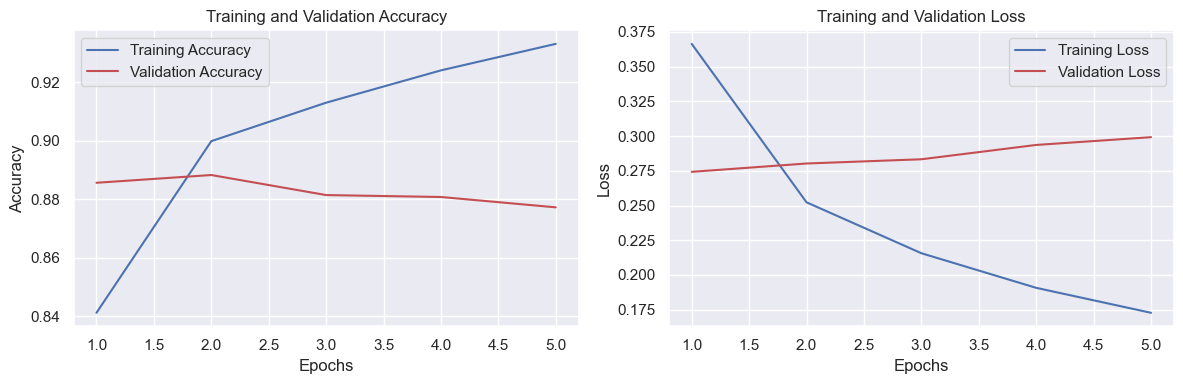

In [150]:
# Access training history
training_loss = history_RNN.history['loss']
training_accuracy = history_RNN.history['accuracy']
validation_loss = history_RNN.history['val_loss']
validation_accuracy = history_RNN.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [151]:
rnn_accuracy = model.evaluate(X_test, y_test)[1]
print("RNN Model Accuracy:", rnn_accuracy)

142/142 [==============================] - 2s 15ms/step - loss: 0.2992 - accuracy: 0.8772
RNN Model Accuracy: 0.8772355914115906


In [152]:
# model.save("RNN.h5")

In [158]:
import numpy as np
from tensorflow.keras.models import load_model

# load the RNN model
rnn_model = load_model('RNN.h5') 

# Define a function for preprocessing user input
def preprocess_input_rnn(user_input):
    # converting to lowercase
    user_input = user_input.lower() 
    
    # removing special characters
    pattern = r'[^A-Za-z0-9\s]+'
    user_input = re.sub(pattern, '', user_input)
    
    # Use regular expression to remove numeric data
    user_input = re.sub(r'\d+', '', user_input)
    
    tokens = word_tokenize(user_input)  # tokenization
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words] # remove stop words
    
    # Remove duplicates by converting to a set and back to a list
    unique_tokens = list(set(filtered_tokens))
    
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos="v") for token in unique_tokens]

    # Convert the list to a Pandas Series
    my_series = pd.Series(lemmatized_tokens)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(my_series)
    sequences = tokenizer.texts_to_sequences(my_series)
    max_sequence_length = max(len(seq) for seq in sequences)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

    return padded_sequences

# Define a function to make predictions using the loaded model
def make_predictions_rnn(rnn_model, user_input):
    # Preprocess the user input
    preprocessed_input = preprocess_input_rnn(user_input)

    # Make predictions on the preprocessed input
    predictions = rnn_model.predict(preprocessed_input)

    # Map the model's output to sentiment labels (0 for negative, 1 for positive)
    sentiment_labels = np.argmax(predictions, axis=1)

    return sentiment_labels

# Interactive loop for user input and predictions
while True:
    user_input = input("Enter a text for sentiment analysis (or 'exit' to quit): ")
    
    if user_input.lower() == 'exit':
        break

    # Make predictions using the loaded model
    predictions = make_predictions_rnn(rnn_model, user_input)

    # Map numeric predictions to sentiment labels
    sentiment_labels = ['negative', 'positive']
    sentiment = [sentiment_labels[label] for label in predictions]

    # Print the sentiment
    print(f"Predicted Sentiment: {sentiment[0]}")


Enter a text for sentiment analysis (or 'exit' to quit): love this dress
1/1 [==============================] - 1s 863ms/step
Predicted Sentiment: positive
Enter a text for sentiment analysis (or 'exit' to quit): exit
